You can define the optical system in two format *.txt* or *.json*.

For *.txt* file, the data of a spheric is arranged by:

|surface type | radius of curvature | distance | material | radius | conic | aspherical terms|
| ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|S      | 5.4153E+001 | 8.7466E+000 | SK2 | 2.9339E+001 | 0.0000E+000 | - |

For *.json* file, the data of spheric is arranged by:

```json
"Standard1": {
        "index"   : 1,
        "roc"     : 5.415324616573791E+001,
        "distance": 8.746657850000000E+000,
        "material": "SK2",
        "radius"  : 2.933920437194000E+001,
        "conic"   : 0.000000000000000E+000,
        "ai-terms": null,
        "variable": ["c", "d"]
    },
```

For more information about the statement of object plane and image plane, please see *../lens_file/doubleGauss.txt* or *../lens_file/doubleGauss.json*

In [21]:
# import the packages
import numpy as np
import torch
import difftrace as dg
# load the lens
device = torch.device('cpu')
dtype = torch.float64
lens = dg.System('lens_file/doubleGauss.json', torch.float64, torch.device('cpu'))
# define analysis
views = torch.tensor([0., 10., 14.], dtype=dtype, device=device)
wavelengths = torch.tensor([dg.lambda_F, dg.lambda_d, dg.lambda_C], dtype=dtype, device=device)
ana = dg.Analysis(lens, views, wavelengths, dtype=dtype, device=device)

See the system configuration with ```ana.plot_setup_2d()```

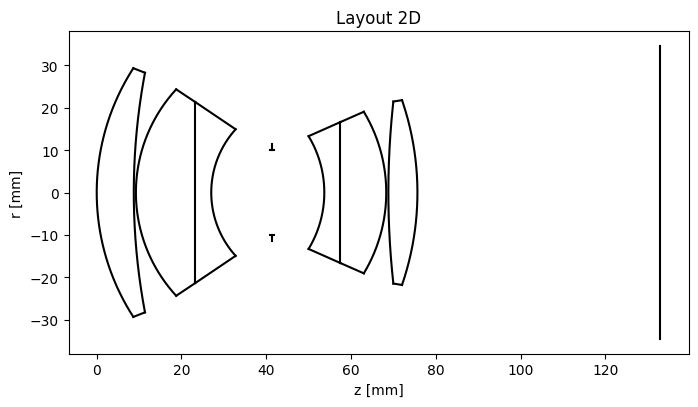

(<Axes: title={'center': 'Layout 2D'}, xlabel='z [mm]', ylabel='r [mm]'>,
 <Figure size 800x600 with 1 Axes>)

In [7]:
# test plot setup 2d
ana.plot_setup_2d()

See the system configuration and the rays with ```ana.plot_setup_2d_with_trace()```

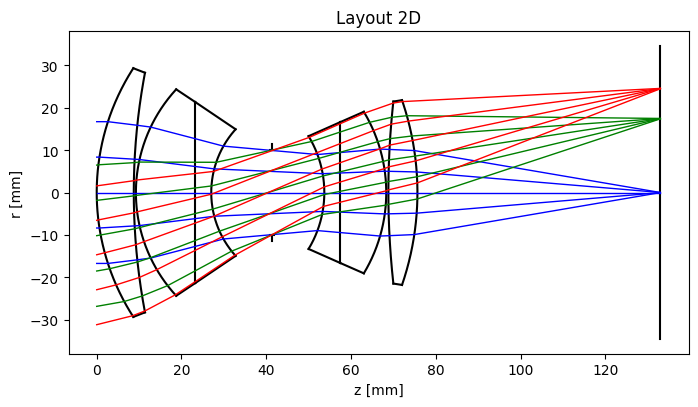

(<Axes: title={'center': 'Layout 2D'}, xlabel='z [mm]', ylabel='r [mm]'>,
 <Figure size 800x600 with 1 Axes>)

In [8]:
# test plot setup 2d with the ray tracing
ana.plot_setup_2d_with_trace()

show the spot diagram of the system ```ana.spot_diagram(views, wavelengths, *args)```

for more arguments, please see the *spot_diagram* in *analysis.py*

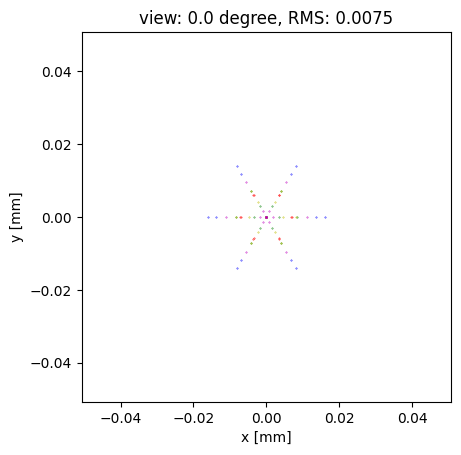

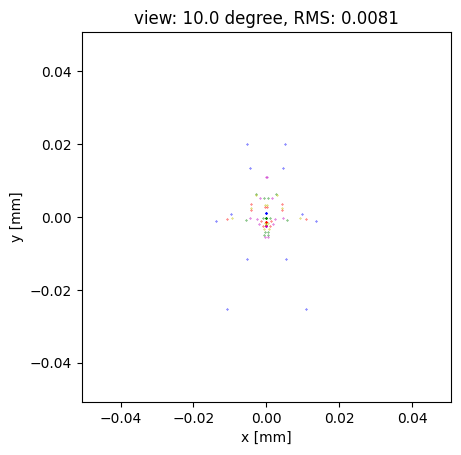

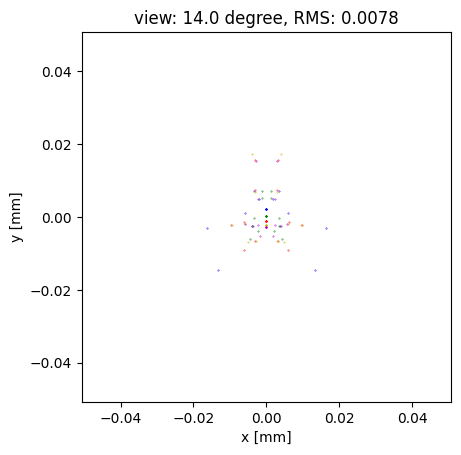

tensor([0.0075, 0.0081, 0.0078])

In [9]:
# test spot diagram 
# the default rays sampling is `radial`
ana.spot_diagram()

Output the result of single ray *defined_wz_(Px, Py)*.

Every intersection to the surface and the direction cosine will be reported.

In [10]:
# report single ray tracing results
ana.single_ray_trace()

Ray Trace Data 

Lens Title: DoubleGauss Zemax
Units         :   Millimeters
Wavelength    :   0.550000  um
Coordinates   :   Global coordinates relative to surface 1 

Field-of-View :   14.000000 degree (represent in angle) 
Normalized X Pupil Coord (Px) :      0.0000000000
Normalized Y Pupil Coord (Py) :      1.0000000000 

Real Ray Trace Data: 

Surf        X-coordinate         Y-coordinate         Z-coordinate         X-cosine         Y-cosine         Z-cosine         Path length
OBJ             Infinity             Infinity             Infinity     0.0000000000     0.2419218956     0.9702957263                   -
  1     1.3877787808E-15     1.7708003310E+00     2.8960152203E-02    -0.0000000000     0.1376085194     0.9904866962    2.9846727569E-02
  2     1.2999927813E-15     2.9860131033E+00     8.7758901358E+00    -0.0000000000     0.2336847756     0.9723124115    8.8309414119E+00
  3     1.2933089000E-15     3.1320089382E+00     9.3833476047E+00    -0.0000000000     0.1094954

Wave front map function

Attention: this calculation has slight differences with the result of *Zemax*, mainly because of the different calc way of the *exit pupil*!

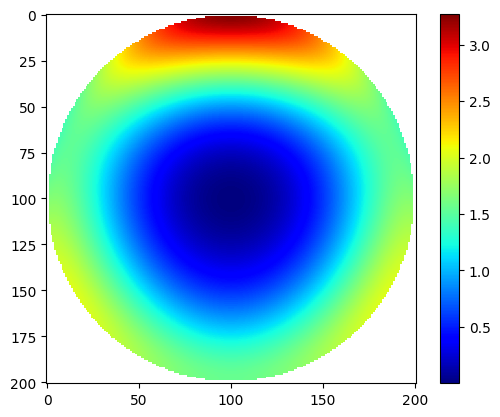

In [11]:
# wavefront map of the system
_ = ana.wavefront_map()

PSF calculation. Here we provide many methods to simulate the psf of system. You can use `psf_spot`, `psf_coherent`, `psf_huygens`, `psf_kirchoff`. More psf calculation method will add to this framework later, such as `psf_gausslet` that could simulate the *diffractive optical elements*.

below is the detailed comparisons:

`psf_spot`: form the psf by counting the rays number.

`psf_coherent`: calculate the psf by the superposition of coherent plane wavelet.

`psf_huygens`: calculate the psf by geometric tracing and pupil diffraction approximation.

`psf_kirchoff`: calculate the psf by geometric tracing and the superposition of the spherical wavelets from pupil plane, where tilt factor is considered.

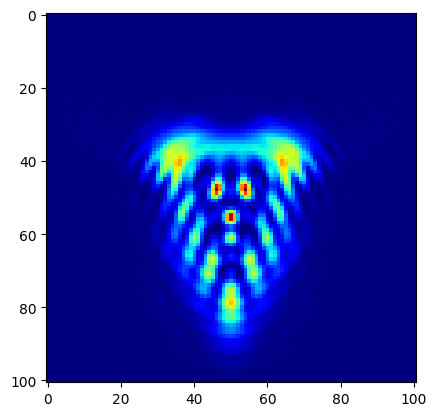

In [15]:
import matplotlib.pyplot as plt
pupil_sampling = 201
image_sampling = 101
image_delta = 0.0005
sample_distribution = 'hexapolar'
psf_kirchoff = ana.psf_kirchoff(pupil_sampling=pupil_sampling, 
                                image_sampling=image_sampling,
                                image_delta=image_delta)
plt.imshow(psf_kirchoff, cmap='jet')

MTF calculation from the psf measurements

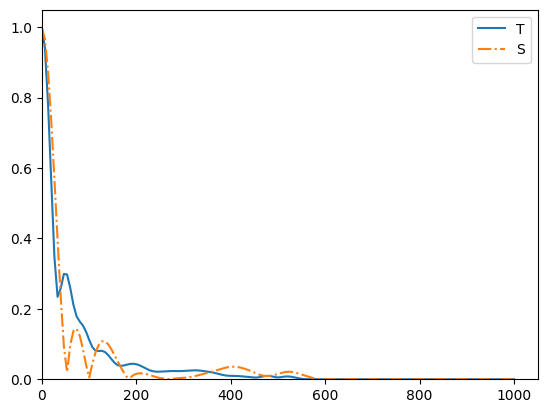

In [16]:
# %%
# mtf calculation method
_, _, _ = ana.mtf(pupil_sampling, image_sampling, image_delta, method='kirchoff', show=True)